# TRY CLIP MODEL

First test of CLIP model with Tensorflow (from HuggingFace) and design of a test Lambda function for extracting text features 

In [1]:
import tensorflow as tf
import transformers
import os
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from PIL import Image

2023-03-25 18:24:33.566750: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-25 18:24:33.566853: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-25 18:24:37.633954: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-25 18:24:37.634158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-25 18:24:37.634179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

### <b>CONSTANTS</b>

In [2]:
DATA_PATH = 'data'
IMAGES_PATH = os.path.join(DATA_PATH, 'unsplash-research-dataset-lite-latest')
IMAGES_OUTPUT = os.path.join(DATA_PATH, 'unsplash_output_images')
ASSETS_PATH = os.path.join(DATA_PATH, 'assets')
RESIZE = (256,256)

### Test text features

In [3]:
from transformers import CLIPTokenizer, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(["a photo of a hound", "a photo of a dog"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)

2023-03-24 21:48:05.180072: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-24 21:48:05.180173: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 21:48:05.180225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (robert-VirtualBox): /proc/driver/nvidia/version does not exist
All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


In [4]:
text_features

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01764771, -0.06101748, -0.48657253, ..., -0.52767116,
        -0.40301576,  0.09337825],
       [ 0.09318563,  0.2764239 , -0.4137126 , ..., -0.5851508 ,
        -0.25898555,  0.11934153]], dtype=float32)>

In [ ]:
text_features[1].shape

In [ ]:
inputs = tokenizer(["two people", "three animals"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)
text_features

In [ ]:
model = TFCLIPModel.from_pretrained("/home/robert/.cache/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots/e6a30b603a447e251fdaca1c3056b2a16cdfebeb/")

tokenizer = CLIPTokenizer.from_pretrained("/home/robert/.cache/huggingface/hub/models--openai--clip-vit-base-patch32/snapshots/e6a30b603a447e251fdaca1c3056b2a16cdfebeb/")

inputs = tokenizer(["a photo of a hound", "a photo of a dog"], padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs)

In [ ]:
m = tf.keras.metrics.CosineSimilarity()
m.update_state(text_features[0], text_features[1])
m.result().numpy()

### Test image features

In [3]:
df_images = pd.read_csv(os.path.join(IMAGES_PATH, 'photos.tsv000'), delimiter='\t')
df_images.head()

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
0,XMyPniM9LF0,https://unsplash.com/photos/XMyPniM9LF0,https://images.unsplash.com/uploads/1411949294...,2014-09-29 00:08:38.594364,t,4272,2848,1.50,Woman exploring a forest,michellespencer77,...,NaN,NaN,2375421,6967,woman walking in the middle of forest,NaN,NaN,NaN,NaN,L56bVcRRIWMh.gVunlS4SMbsRRxr
1,rDLBArZUl1c,https://unsplash.com/photos/rDLBArZUl1c,https://images.unsplash.com/photo-141633941111...,2014-11-18 19:36:57.08945,t,3000,4000,0.75,Succulents in a terrarium,ugmonk,...,NaN,NaN,13784815,82141,succulent plants in clear glass terrarium,NaN,NaN,NaN,NaN,LvI$4txu%2s:_4t6WUj]xat7RPoe
2,cNDGZ2sQ3Bo,https://unsplash.com/photos/cNDGZ2sQ3Bo,https://images.unsplash.com/photo-142014251503...,2015-01-01 20:02:02.097036,t,2564,1710,1.50,Rural winter mountainside,johnprice,...,NaN,NaN,1302461,3428,rocky mountain under gray sky at daytime,NaN,NaN,NaN,NaN,LhMj%NxvM{t7_4t7aeoM%2M{ozj[
3,iuZ_D1eoq9k,https://unsplash.com/photos/iuZ_D1eoq9k,https://images.unsplash.com/photo-141487280988...,2014-11-01 20:15:13.410073,t,2912,4368,0.67,Poppy seeds and flowers,krisatomic,...,NaN,NaN,2890238,33704,red common poppy flower selective focus phography,NaN,NaN,NaN,NaN,LSC7DirZAsX7}Br@GEWWmnoLWCnj
4,BeD3vjQ8SI0,https://unsplash.com/photos/BeD3vjQ8SI0,https://images.unsplash.com/photo-141700759404...,2014-11-26 13:13:50.134383,t,4896,3264,1.50,Silhouette near dark trees,jonaseriksson,...,NaN,NaN,8704860,49662,trees during night time,NaN,NaN,NaN,NaN,L25|_:V@0hxtI=W;odae0ht6=^NG


In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'colors.tsv000'), delimiter='\t').head()

In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'collections.tsv000'), delimiter='\t').head()

In [ ]:
pd.read_csv(os.path.join(IMAGES_PATH, 'keywords.tsv000'), delimiter='\t').head()

In [ ]:
idx = np.random.randint(len(df_images))
image_data = requests.get(df_images.loc[idx, 'photo_image_url'], stream=True).content
image_data = tf.io.decode_image(image_data).numpy()
plt.imshow(image_data)

In [ ]:
response = requests.get(df_images.loc[idx, 'photo_image_url'], stream=True)
response.headers['Content-Type'].split('/')[-1]

#### Download images

In [ ]:
from io import BytesIO

if not os.path.exists(IMAGES_OUTPUT):
    os.mkdir(IMAGES_OUTPUT)

NUM_IMAGES = 200
idx_list = np.random.randint(len(df_images), size=NUM_IMAGES)

for idx in idx_list:
    image = df_images.iloc[idx]
    response = requests.get(image['photo_image_url'], stream=True)
    
    if response.status_code == 200:
        extension = response.headers['Content-Type'].split('/')[-1]
        extension = 'jpeg' if extension == 'octet-stream' else extension
        image_path = os.path.join(IMAGES_OUTPUT, image['photo_id'] + '.' + extension)
        
        if not os.path.exists(image_path):
            img = Image.open(BytesIO(response.content)).resize(RESIZE)
            img.save(image_path)
        else:
            print(f"Image with ID {image['photo_id']}[{idx}] already exists in directory")
    else:
        print(f"Image with ID {image['photo_id']}[{idx}] failed to download")

In [ ]:
from multiprocessing import Pool
from io import BytesIO

def download_images(image):
    url, image_id = image[0], image[1]
    response = requests.get(url, stream=True)
    
    if response.status_code == 200:
        extension = response.headers['Content-Type'].split('/')[-1]
        extension = 'jpeg' if extension == 'octet-stream' else extension
        image_path = os.path.join(IMAGES_OUTPUT, image_id + '.' + extension)
        
        if not os.path.exists(image_path):
            img = Image.open(BytesIO(response.content)).resize(RESIZE)
            img.save(image_path)
        else:
            print(f"Image with ID {image_id} already exists in directory")
    else:
        print(f"Image with ID {image_id} failed to download")

NUM_IMAGES = 500     
images = df_images.loc[NUM_IMAGES:NUM_IMAGES*2, ['photo_image_url', 'photo_id']].to_numpy().tolist()

pool = Pool()
pool.map(download_images, images)

In [ ]:
image_paths = pd.DataFrame(os.listdir(IMAGES_OUTPUT), columns=['filename'])
image_paths

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

idx = np.random.randint(len(df_images))
random_image = df_images.iloc[idx]
image = Image.open(requests.get(random_image['photo_image_url'], stream=True).raw)

inputs = processor(images=image, return_tensors="tf")

image_features = model.get_image_features(**inputs)
image_features

In [7]:
image_features.shape

TensorShape([1, 512])

In [ ]:
text_features.shape

### Extract image embeddings for the dataset

In [ ]:
from transformers import CLIPProcessor, TFCLIPModel

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
from tqdm import tqdm

images_paths = [os.path.join(root, file) for root, dirs, files in os.walk(IMAGES_OUTPUT) for file in files]
image_embeddings = []

for path in tqdm(images_paths):
    image = Image.open(path).resize(RESIZE)
    
    inputs = processor(images=image, return_tensors="tf")
    image_features = model.get_image_features(**inputs)
    image_embeddings.append(image_features / np.linalg.norm(image_features, ord=2))
    del image

In [ ]:
# use of multiprocessing for speedup

from multiprocessing import Pool
from tqdm import tqdm

images_paths = [os.path.join(root, file) for root, dirs, files in os.walk(IMAGES_OUTPUT) for file in files]

def extract_image_embeddings(path):
    image = Image.open(path).resize(RESIZE)
    
    inputs = processor(images=image, return_tensors="tf")
    image_features = model.get_image_features(**inputs)
    del image
    
    return path, image_features / np.linalg.norm(image_features, ord=2)
    
with Pool(5) as p:
    image_embeddings = list(tqdm(p.imap(extract_image_embeddings, images_paths), total=len(images_paths)))

In [ ]:
image_paths, image_embeddings = zip(*image_embeddings)
image_paths = np.array(image_paths)
image_embeddings = list(image_embeddings)

In [ ]:
np.save(os.path.join(ASSETS_PATH, 'images_filenames.npy'), np.array(images_paths), allow_pickle=True)

In [ ]:
np.save(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy'), tf.convert_to_tensor(image_embeddings).numpy().squeeze(), allow_pickle=True)

In [92]:
np.save(os.path.join(ASSETS_PATH, 'image_CLIP_train_imageids.npy'), np.array([os.path.split(im)[-1] for im in images_paths]), allow_pickle=True)

### Fetch images based on user text input

In [32]:
embeddings = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_embeddings.npy'))
images_paths = np.load(os.path.join(ASSETS_PATH, 'images_filenames.npy'))
embeddings.shape

(1196, 512)

#### <b>Search in "sequential" mode</b>
Euclidean distance or cosine similarity for each vector in the embeddings matrix

In [33]:
model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


In [34]:
user_input = input("Search images:").lower()

inputs = tokenizer(user_input, padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs).numpy().squeeze()

Search images: black cats


In [35]:
dists = []
cosines = []
for i, emb in enumerate(embeddings):
    cos_sim = np.dot(text_features, emb) / np.linalg.norm(text_features)
    l2_dist = np.linalg.norm((text_features / np.linalg.norm(text_features)) - emb, ord=2)
    dists.append(l2_dist)
    cosines.append(cos_sim)
    #print(f'Index {i}:', l2_dist)

dists = np.array(dists)
print('Most similar index (DISTANCE):', dists.argmin())
print('Top 10 similar indexes (DISTANCE):', dists.argsort()[:10])
print()

cosines = np.array(cosines)
print('Most similar index (COSINE):', cosines.argmax())
print('Top 10 similar indexes (COSINE):', cosines.argsort()[::-1][:10])

Most similar index (DISTANCE): 620
Top 10 similar indexes (DISTANCE): [ 620  973 1034  919  356  720 1050 1133  916   70]

Most similar index (COSINE): 620
Top 10 similar indexes (COSINE): [ 620  973 1034  919  356  720 1050 1133  916   70]


In [36]:
cosines[cosines.argsort()[::-1][:10]]

array([0.2653011 , 0.26410717, 0.24820276, 0.24530734, 0.23760775,
       0.23468421, 0.23332348, 0.22971547, 0.2295113 , 0.22801347],
      dtype=float32)

In [37]:
def show_images(images, num_images=10, columns=5):
    fig = plt.figure(figsize=(20, 20))
    for i in range(num_images):
        fig.add_subplot(int(len(images) / columns + 1), columns, i+1)
        plt.axis('off')
        plt.imshow(images[i])
    plt.show()

In [38]:
NUM_IMAGES = 10
RESHAPE = (256,256)

most_similar = dists.argsort()[:NUM_IMAGES] # cosines.argsort()[::-1][:NUM_IMAGES] #
loaded_images = []

for idx in most_similar:
    path = images_paths[idx]
    image = np.asarray(Image.open(path).resize(RESHAPE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
loaded_images.shape

(10, 256, 256, 3)

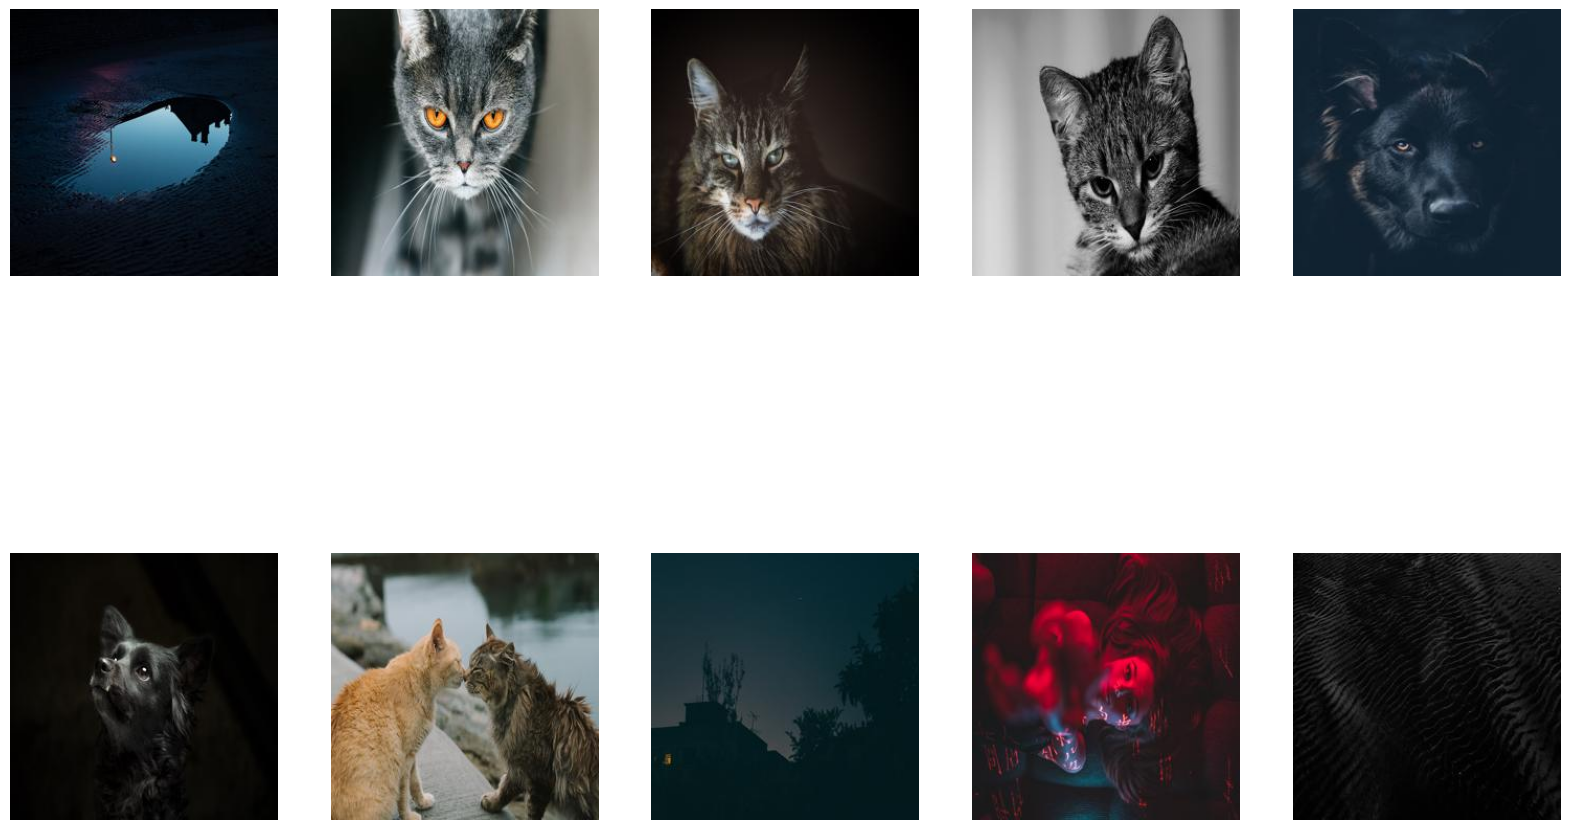

In [39]:
show_images(loaded_images, num_images=NUM_IMAGES)

#### <b>Using sklearn's KNN</b>

[(620, 9.25724261497556), (973, 9.258464342821908), (1034, 9.27472125763024), (919, 9.277678036740548), (356, 9.285535856775361), (720, 9.288517530928349), (1050, 9.289905147335164), (1133, 9.293583237486489), (916, 9.293791341272795), (70, 9.295317703735517)]


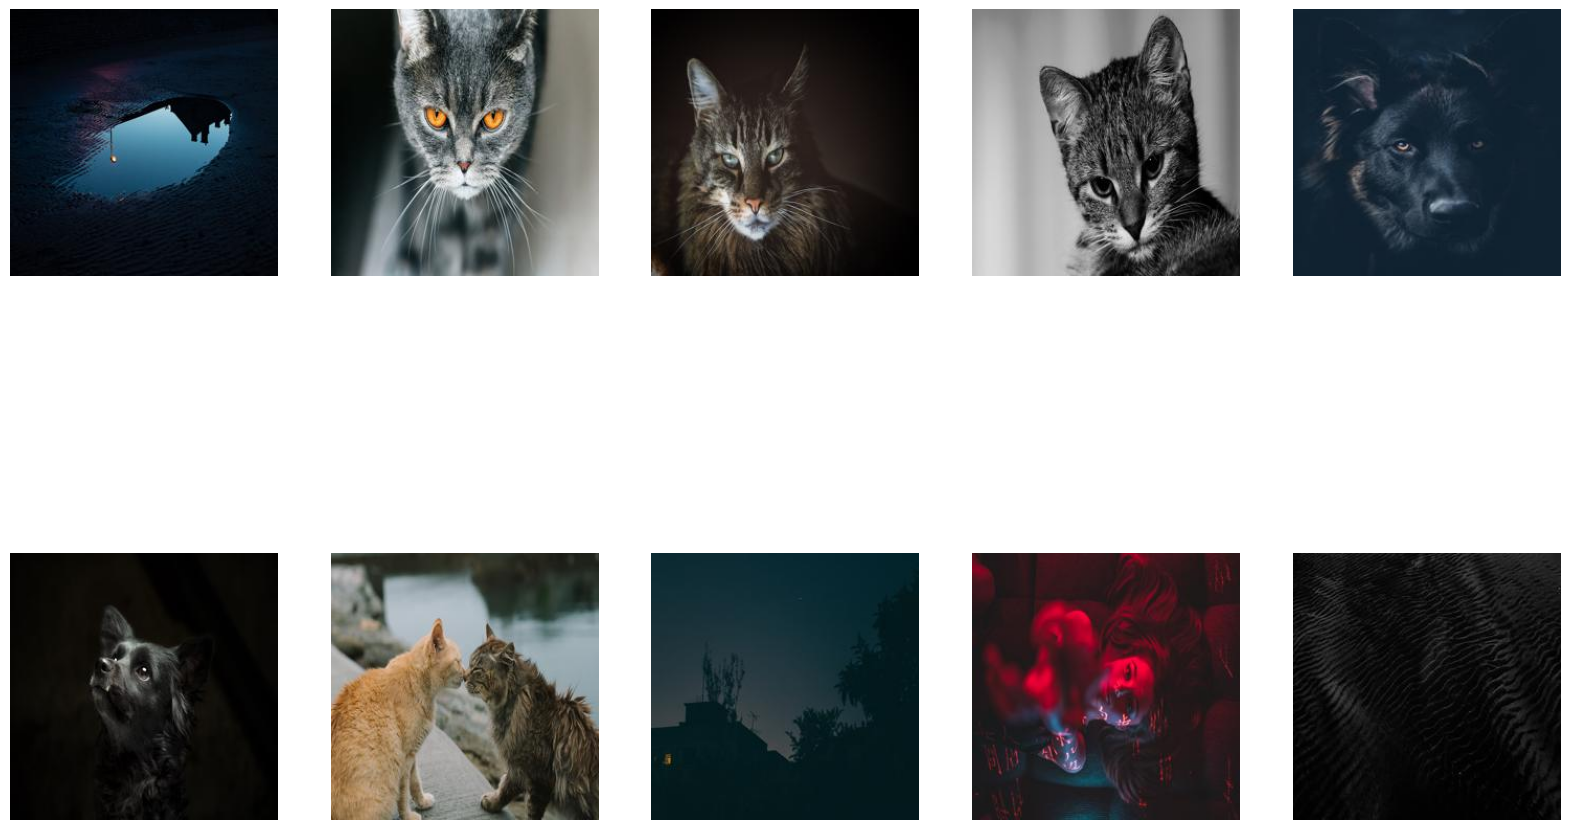

In [43]:
from sklearn.neighbors import KNeighborsClassifier

NEIGHBORS = 10
knn = KNeighborsClassifier(n_neighbors=NEIGHBORS).fit(embeddings, np.zeros(len(embeddings)))

neigh_dist, neigh_ind = knn.kneighbors([text_features], n_neighbors=NEIGHBORS)

print(list(zip(neigh_ind.squeeze(), neigh_dist.squeeze())))

loaded_images = []

for idx in neigh_ind.squeeze():
    path = images_paths[idx]
    image = np.asarray(Image.open(path).resize(RESHAPE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
show_images(loaded_images, num_images=NUM_IMAGES)

### <b>FAISS</b>

In [6]:
from transformers import CLIPProcessor, TFCLIPModel, CLIPTokenizer

model = TFCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

2023-03-25 18:31:16.581023: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-25 18:31:16.581779: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-25 18:31:16.581821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (robert-VirtualBox): /proc/driver/nvidia/version does not exist
All model checkpoint layers were used when initializing TFCLIPModel.

All the layers of TFCLIPModel were initialized from the model checkpoint at openai/clip-vit-base-patch32.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCLIPModel for predictions without further training.


In [41]:
user_input = input("Search images:").lower()

inputs = tokenizer(user_input, padding=True, return_tensors="tf")

text_features = model.get_text_features(**inputs).numpy().squeeze()

Search images: black cats


In [62]:
import faiss

nlist = 15
d = embeddings.shape[1] # == 512
k = 10

quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
index = faiss.IndexIVFFlat(quantizer, d, nlist)
index.train(embeddings)  # we must train the index to cluster into cells
#index.add(embeddings)

In [55]:
index.ntotal

0

In [65]:
index_to_id = {}
id_to_path = {}

image_ids = [os.path.split(path)[-1].split('.')[0] for path in images_paths]
id_to_path = dict(zip(image_ids, images_paths))
for image_id, emb in zip(image_ids, embeddings):
    if image_id not in index_to_id:
        index.add_with_ids(emb.reshape(1, -1), np.array([index.ntotal]))
        index_to_id[index.ntotal - 1] = image_id

In [66]:
print(len(index_to_id), index.ntotal)

1196 1196


In [68]:
index.is_trained

True

In [73]:
# write index to file
faiss.write_index(index, os.path.join(ASSETS_PATH, 'faiss_ivf.index'))

In [16]:
# update embeddings
import json
import faiss

index_path = os.path.join(ASSETS_PATH, 'faiss_ivf.index')
index_map_path = os.path.join(ASSETS_PATH, 'index_to_id.json')
metadata_path = os.path.join(ASSETS_PATH, 'metadata.json')
train_embs = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy')) # required
train_image_ids = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_imageids.npy')) # required

if os.path.exists(index_map_path):
    with open(index_map_path, mode='r') as f:
        index_to_id = json.load(f)
else:
    index_to_id = {}

if not os.path.exists(index_path):
    # initialize new index
    nlist = 15
    d = train_embs.shape[1] # == 512

    quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
    index = faiss.IndexIVFFlat(quantizer, d, nlist)
    index.train(train_embs)  # we must train the index to cluster into cells
            
    print(f"New FAISS index created in '{os.path.join(ASSETS_PATH, 'faiss_ivf.index')}'")
    print(f"Number of elements in index after creation:", index.ntotal)
else:
    index = faiss.read_index(index_path)
    print("IVF index read from file")
    

# write new samples
id_to_index = {v:k for k,v in index_to_id.items()}
    
for image_id, emb in zip(train_image_ids, train_embs):
    if image_id not in id_to_index:
        index.add_with_ids(emb.reshape(1, -1), np.array([index.ntotal]))
        index_to_id[int(index.ntotal - 1)] = image_id
    else:
        print(f"Image with ID {image_id} already present in index")

faiss.write_index(index, os.path.join(ASSETS_PATH, 'faiss_ivf.index'))

with open(index_map_path, mode='w+') as f:
    json.dump(index_to_id, f)
    
print(f"New index to ID dictionary created in {index_map_path}")
print(f"Index to ID dictionary number of elements:", len(index_to_id))

New FAISS index created in 'data/assets/faiss_ivf.index'
Number of elements in index after creation: 0
New index to ID dictionary created in data/assets/index_to_id.json
Index to ID dictionary number of elements: 1196


IVF index read from file
[(620, 85.69655), (973, 85.71915), (1034, 86.02047), (919, 86.07526), (356, 86.22121), (720, 86.276505), (1050, 86.302345), (916, 86.37457), (70, 86.403), (1049, 86.40395)]


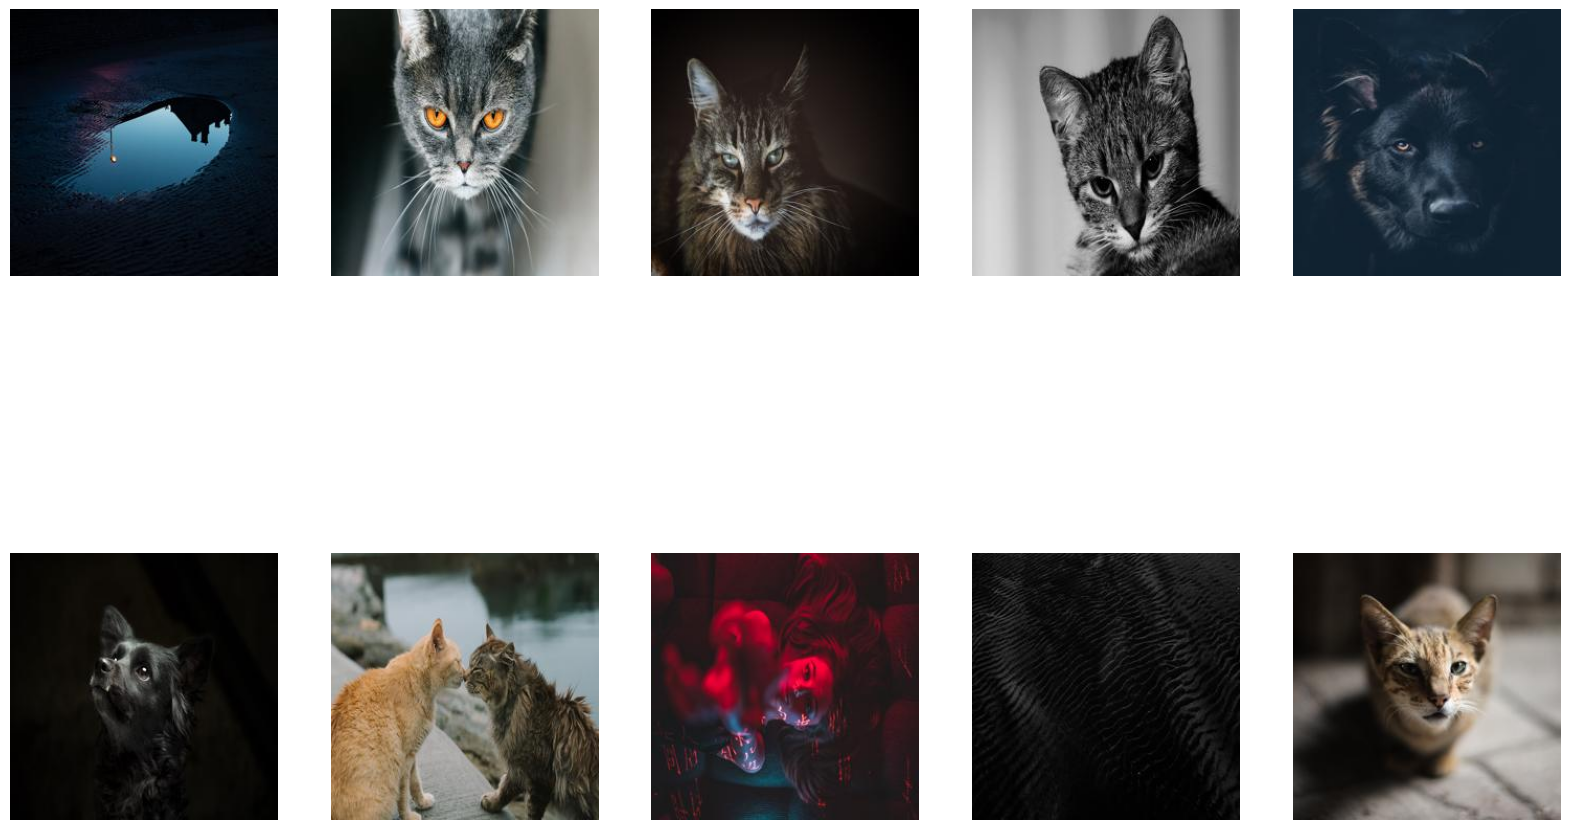

In [45]:
index_path = os.path.join(ASSETS_PATH, 'faiss_ivf.index')
index_map_path = os.path.join(ASSETS_PATH, 'index_to_id.json')

if not os.path.exists(index_path):
    train_embs = np.load(os.path.join(ASSETS_PATH, 'image_CLIP_train_embeddings.npy'))
    
    nlist = 15
    d = train_embs.shape[1] # == 512
    k = 10

    quantizer = faiss.IndexFlatIP(d)  # how the vectors will be stored/compared
    index = faiss.IndexIVFFlat(quantizer, d, nlist)
    index.train(train_embs)  # we must train the index to cluster into cells
    index.add(train_embs)
else:
    index = faiss.read_index(index_path)
    index.nprobe = 3
    print("IVF index read from file")

k = 10
index.nprobe = 5  # set how many of nearest cells to search
neigh_dist, neigh_ind = index.search(np.array([text_features]), k)
print(list(zip(neigh_ind.squeeze(), neigh_dist.squeeze())))

with open(index_map_path, mode='r') as f:
    index_to_id = json.load(f)
    index_to_id = {int(k):v for k,v in index_to_id.items()}

loaded_images = []

for idx in neigh_ind.squeeze():
    image_id = index_to_id[idx]
    path = os.path.join(IMAGES_OUTPUT, image_id)
    image = np.asarray(Image.open(path).resize(RESIZE))
    loaded_images.append(image)
    del image
    
loaded_images = np.array(loaded_images)
show_images(loaded_images, num_images=NUM_IMAGES)

### Lambda function to upload embeddings to Dynamo from images in S3

In [46]:
# S3 upload event
event = {'Records': [{'eventVersion': '2.1', 'eventSource': 'aws:s3', 'awsRegion': 'us-east-1', 'eventTime': '2023-03-25T18:05:06.304Z', 'eventName': 'ObjectCreated:Put', 'userIdentity': {'principalId': 'AWS:AROAQYKP6KM2MDPD3T5PZ:user2352949=Robert.Farzan'}, 'requestParameters': {'sourceIPAddress': '139.47.64.241'}, 'responseElements': {'x-amz-request-id': '9RZJ30GXDTDNJFJ2', 'x-amz-id-2': 'xNgyAvx2d54xd37+IMAMaBNMeld+k/1co/glPpsEjFYGpTlm+zbsOtUbSIZuEKiZSnsX2DH+icEF857dyk30/TITqrJZm4sU'}, 's3': {'s3SchemaVersion': '1.0', 'configurationId': 'cf660493-9c7f-4713-b436-bab8d4d8e977', 'bucket': {'name': 'clip.images.tfm.robert', 'ownerIdentity': {'principalId': 'A3FP2E3WKJSMR'}, 'arn': 'arn:aws:s3:::clip.images.tfm.robert'}, 'object': {'key': '_EES7QLyDRs.jpeg', 'size': 15448, 'eTag': '66d9c56fad5666ed69a31c76251c863a', 'sequencer': '00641F37D2295A4F88'}}}]}

In [47]:
event

{'Records': [{'eventVersion': '2.1',
   'eventSource': 'aws:s3',
   'awsRegion': 'us-east-1',
   'eventTime': '2023-03-25T18:05:06.304Z',
   'eventName': 'ObjectCreated:Put',
   'userIdentity': {'principalId': 'AWS:AROAQYKP6KM2MDPD3T5PZ:user2352949=Robert.Farzan'},
   'requestParameters': {'sourceIPAddress': '139.47.64.241'},
   'responseElements': {'x-amz-request-id': '9RZJ30GXDTDNJFJ2',
    'x-amz-id-2': 'xNgyAvx2d54xd37+IMAMaBNMeld+k/1co/glPpsEjFYGpTlm+zbsOtUbSIZuEKiZSnsX2DH+icEF857dyk30/TITqrJZm4sU'},
   's3': {'s3SchemaVersion': '1.0',
    'configurationId': 'cf660493-9c7f-4713-b436-bab8d4d8e977',
    'bucket': {'name': 'clip.images.tfm.robert',
     'ownerIdentity': {'principalId': 'A3FP2E3WKJSMR'},
     'arn': 'arn:aws:s3:::clip.images.tfm.robert'},
    'object': {'key': '_EES7QLyDRs.jpeg',
     'size': 15448,
     'eTag': '66d9c56fad5666ed69a31c76251c863a',
     'sequencer': '00641F37D2295A4F88'}}}]}

In [49]:
event['Records'][0]['s3']['object']['key']

'_EES7QLyDRs.jpeg'

In [115]:
TFCLIPModel.from_pretrained(os.path.join(ASSETS_PATH, 'clip-vit-base-patch32'), config="config.json")

OSError: config.json is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `use_auth_token` or log in with `huggingface-cli login` and pass `use_auth_token=True`.

In [60]:
import json
import boto3
from transformers import CLIPProcessor, TFCLIPModel

TABLE_NAME = "CLIPEmbeddingsTable"
s3_resource = boto3.resource('s3', region_name='us-east-1')
dynamodb_resource = boto3.resource('dynamodb', region_name='us-east-1')
dynamodb_table = dynamodb_resource.Table(TABLE_NAME)

model = TFCLIPModel.from_pretrained(os.path.join(ASSETS_PATH, 'clip-vit-base-patch32'))
processor = CLIPProcessor.from_pretrained(os.path.join(ASSETS_PATH, 'clip-vit-base-patch32'))

In [79]:
from datetime import datetime

dt = datetime.now().isoformat(timespec='microseconds')
dt

'2023-03-25T23:27:24.745185'

In [106]:
import json
import boto3
import pickle
from transformers import CLIPProcessor, TFCLIPModel
from datetime import datetime

TABLE_NAME = "CLIPEmbeddingsTable"
s3_resource = boto3.resource('s3', region_name='us-east-1')
dynamodb_resource = boto3.resource('dynamodb', region_name='us-east-1')
dynamodb_table = dynamodb_resource.Table(TABLE_NAME)

def lambda_handler(event, context):
    
    for record in event.get('Records', []):
        # 1 LEER DATOS DESDE S3
        bucket = record["s3"]["bucket"]["name"]
        key = record["s3"]["object"]["key"]
        obj = s3_resource.Object(bucket, key)
        
        element = obj.get()['Body']
        img = Image.open(element).resize(RESIZE)
        inputs = processor(images=img, return_tensors="tf")
        
        image_features = model.get_image_features(**inputs).numpy().squeeze()
        image_features = image_features / np.linalg.norm(image_features, ord=2)
        ts_now = datetime.now().isoformat(timespec='microseconds')
        
        dynamodb_table.put_item(
                                Item={
                                    'type_pk': "image",
                                    'timestamp': ts_now,
                                    'image_id': key,
                                    'embedding': pickle.dumps(image_features)
                                }
                            )
        plt.imshow(img)
        
    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }

In [72]:
len(json.dumps(np.random.randn(512).tolist())) / 1024

10.3408203125

In [67]:
embedding = np.array([1.259001, 2.00012929, 3.37778901], dtype=np.float32)  # replace with your actual embedding
embedding_str = json.dumps(embedding.tolist())
embedding_str

'[1.2590010166168213, 2.000129222869873, 3.37778902053833]'

{'statusCode': 200, 'body': '"Hello from Lambda!"'}

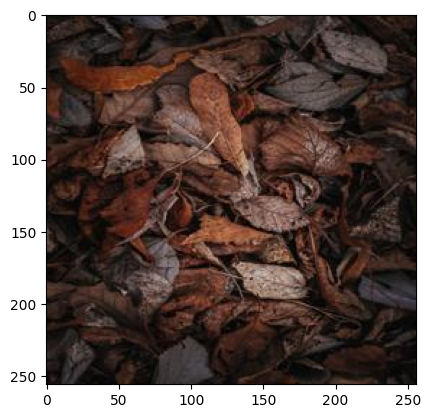

In [107]:
lambda_handler(event, {})

In [90]:
datetime.fromtimestamp(0).isoformat(timespec='microseconds')

'1970-01-01T01:00:00.000000'

In [112]:
response = dynamodb_table.query(
    KeyConditionExpression='#pk = :pk AND #ts > :ts',
    ExpressionAttributeNames={
        '#pk': 'type_pk',
        '#ts': 'timestamp'
    },
    ExpressionAttributeValues={
        ':pk': "image",
        ':ts': datetime.fromtimestamp(0).isoformat(timespec='microseconds')
    },
    ScanIndexForward=False  # Sort in descending order
)

items = response['Items']
for item in items:
    timestamp_str = item['timestamp']
    timestamp = datetime.fromisoformat(timestamp_str)
    embedding = pickle.loads(item['embedding'].value)
    print(f"Timestamp: {timestamp_str}, Embedding: {embedding}")

Timestamp: 2023-03-26T00:14:08.952183, Embedding: [ 2.31736079e-02  5.35299554e-02  5.54699032e-03  5.56572666e-03
  5.67974476e-03  8.05707369e-03  5.63663617e-02  7.48837963e-02
 -2.07798649e-02  2.94424649e-02  1.77499205e-02  2.12050916e-04
 -2.92240344e-02 -1.02004157e-02  1.60709750e-02 -2.62815487e-02
 -2.84273066e-02 -1.18446592e-02  3.31949778e-02  7.60624744e-03
 -2.85957046e-02 -3.63985077e-02 -1.13979634e-02  3.83211742e-03
 -5.32572111e-03  1.29539445e-02  5.18208696e-03  1.83138326e-02
 -5.49481809e-03  3.07047572e-02  3.83048765e-02  1.57595873e-02
 -1.07214516e-02  1.79384823e-03 -1.31790983e-02 -1.31394370e-02
 -4.47619408e-02  2.63965107e-03 -3.63262394e-03  4.01625782e-03
 -3.28312442e-02  6.56119082e-03  1.24125089e-02  1.11762676e-02
  1.57752372e-02 -9.56252739e-02 -1.33766234e-02  3.17517370e-02
  2.78068017e-02  1.95898674e-02 -2.25162320e-02  7.74159841e-03
  7.95839354e-03  1.59721877e-02 -3.36849540e-02  3.83961597e-03
  2.66863815e-02 -4.68278909e-03  1.0824

In [111]:
pickle.loads(embedding).shape

(512,)